# CAB Solar Flares - Assignment
### Shreyas N B

In [2]:
from astropy.io import fits 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.stats import sigma_clipped_stats
%matplotlib inline

In [16]:
lc1 = fits.open('ch2_xsm_20210923_v1_level2.lc')
lc2 = fits.open('ch2_xsm_20210924_v1_level2.lc')
lc3 = fits.open('ch2_xsm_20210927_v1_level2.lc')
lc4 = fits.open('ch2_xsm_20210928_v1_level2.lc')
lc5 = fits.open('ch2_xsm_20210929_v1_level2.lc')

In [17]:
lc1_header = lc1[0].header
lc2_header = lc2[0].header
lc3_header = lc3[0].header
lc4_header = lc4[0].header
lc5_header = lc5[0].header

### 1. a)
The headers present in the first file is shown as below:

In [41]:
lc1.info()

Filename: ch2_xsm_20210923_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   84280R x 4C   ['D', 'E', 'E', 'E']   


All the other files have the same headers.

### 1. b)

The first header, ${PRIMARY}$, contains the following information:

In [47]:
lc1[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MISSION = 'CHANDRAYAAN-2'      / Name of mission/satellite                      
TELESCOP= 'CH-2_ORBITER'       / Name of mission/satellite                      
INSTRUME= 'CH2_XSM '           / Name of Instrument/detector                    
ORIGIN  = 'PRLPOC  '           / Source of FITS file                            
CREATOR = 'xsmgenlc '          / Creator of file                                
FILENAME= 'ch2_xsm_20210923_v1_level2.lc' / Name of file                        
CONTENT = 'Light curve'     

The second header, $RATE$, contains the following information:

In [48]:
lc1[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   20 / width of table in bytes                        
NAXIS2  =                84280 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'TIME    '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'RATE    '           / label for field   2                            
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'ERROR   '        

Since the ${RATE}$ header contains fields named 'TIME', 'RATE', etc., it is reasonable to assume that it is more important in terms of helping us in further tasks related to timestamps and count rates.

### 1. c)
HDU stands for Header Data Unit. It is a top-level FITS object. When a FITS file is opened, it returns a HDUList object. It is contained in $\textit{astropy.io.fits.hdu.hdulist.HDUList}$.

In [49]:
fits.hdu.hdulist.HDUList?

Init signature: fits.hdu.hdulist.HDUList(hdus=[], file=None)
Docstring:     
HDU list class.  This is the top-level FITS object.  When a FITS
file is opened, a `HDUList` object is returned.
Init docstring:
Construct a `HDUList` object.

Parameters
----------
hdus : BaseHDU or sequence thereof, optional
    The HDU object(s) to comprise the `HDUList`.  Should be
    instances of HDU classes like `ImageHDU` or `BinTableHDU`.

file : file-like, bytes, optional
    The opened physical file associated with the `HDUList`
    or a bytes object containing the contents of the FITS
    file.
File:           c:\users\shrey\anaconda3\lib\site-packages\astropy\io\fits\hdu\hdulist.py
Type:           type
Subclasses:     


### 2. a)

In [18]:
lc1_data = lc1[1].data
lc2_data = lc2[1].data
lc3_data = lc3[1].data
lc4_data = lc4[1].data
lc5_data = lc5[1].data

In [71]:
lc1_data.field('RATE').size 

84280

The count rate information is stored in the data type $\textit{numpy.record}$. It contains information with labels: TIME, RATE, ERROR and FRACEXP.

### 2. b)
The lightcurves are plotted as shown below:

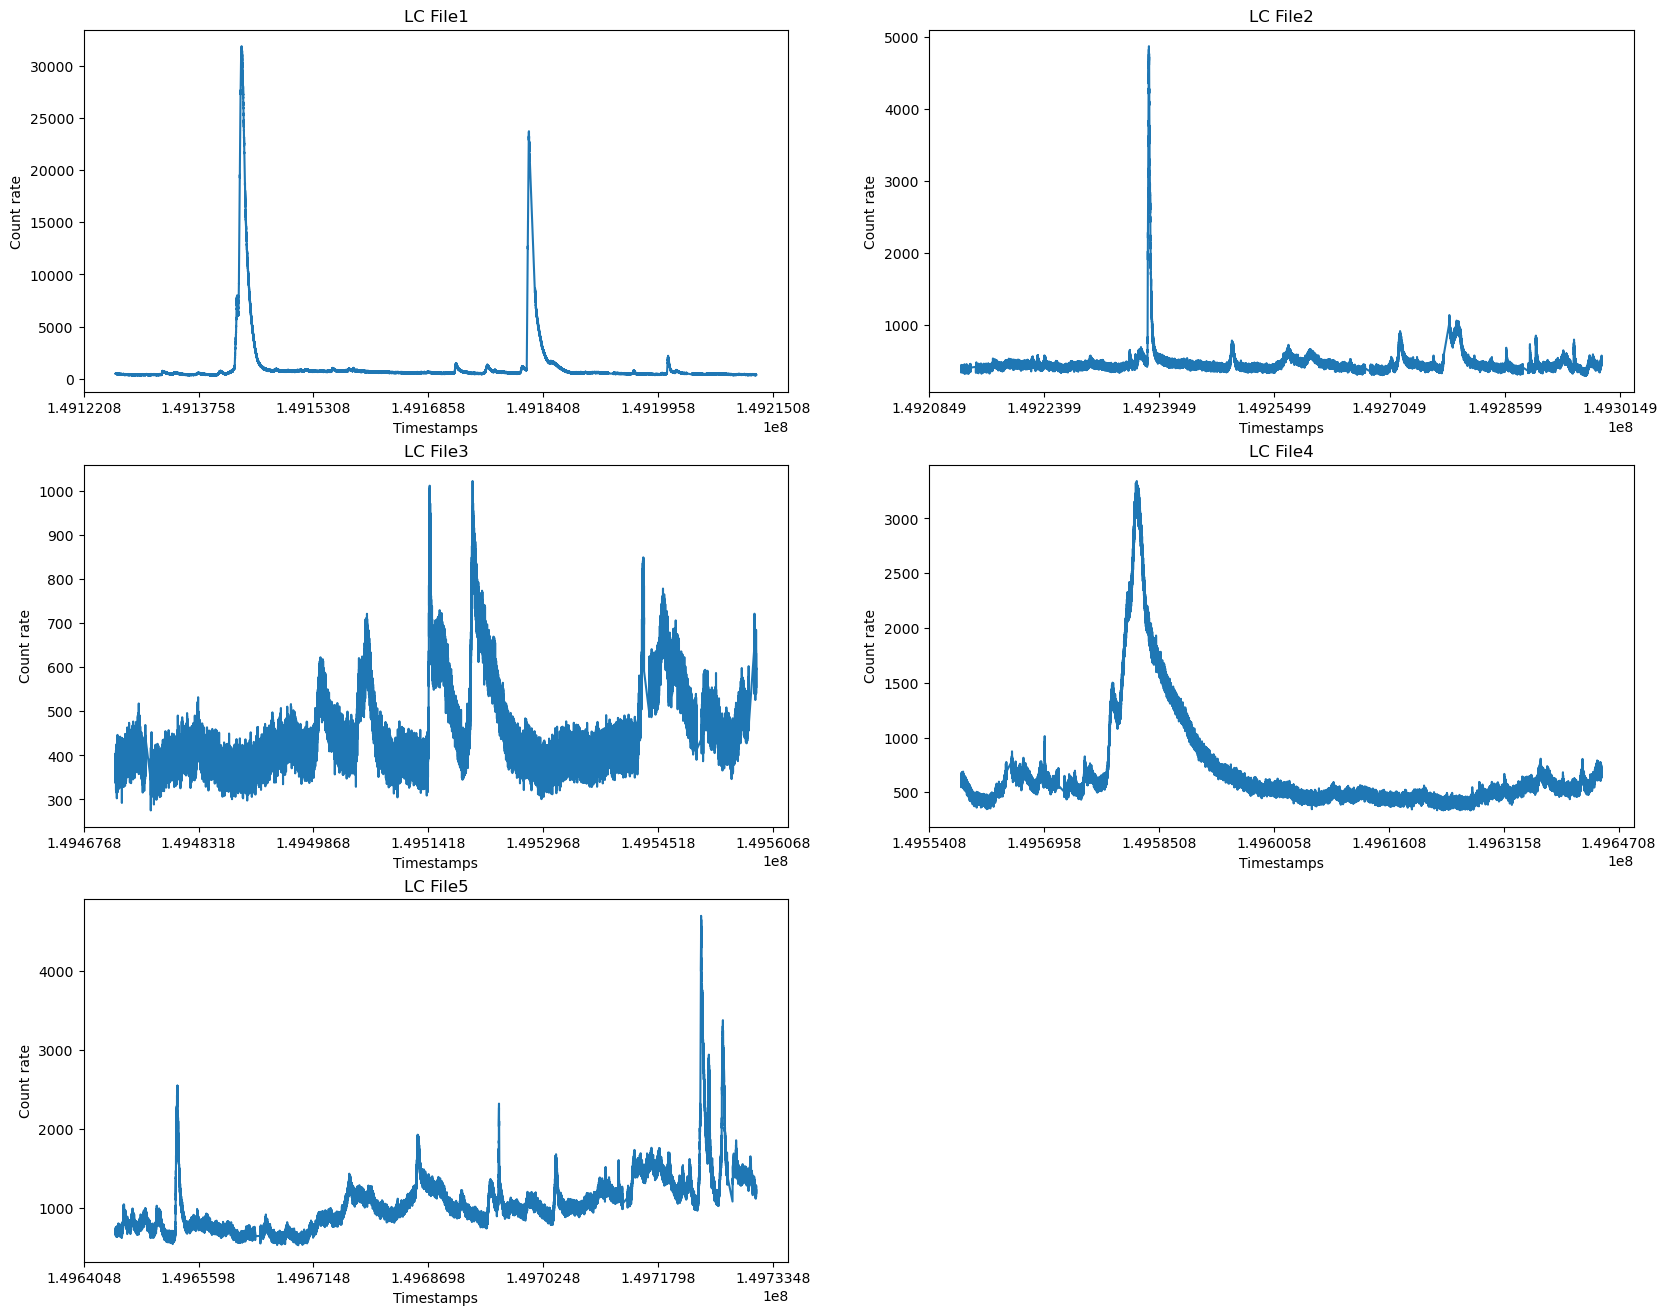

In [83]:
lc_data = np.array([lc1_data, lc2_data, lc3_data, lc4_data, lc5_data], dtype=object)
plt.figure(figsize=(20,16))

for i in range(5):
    plt.subplot(3,2,i+1)
    plt.plot(lc_data[i].field('TIME'), lc_data[i].field('RATE'))
    plt.xticks(np.arange(plt.xlim()[0],plt.xlim()[1], 15500))
    plt.title('LC File '+str(i+1))
    plt.xlabel('Timestamps')
    plt.ylabel('Count rate')
    

### 2. c)
The values on the time axis does not coincide with the start and stop time of observation. These timestamp values signify something else, and hence are peculiar in this regard.

### 3. a)

A flare can be identified if there is a global maxima or the plot shoots up suddenly. For example, there were 2 flares observed in the first plot, 1 in the second plot and so on. $\newline$
For LC File 1: $\newline$

Flare 1 - $(1.4914208$ x ${10^8}$ s, $1.4914608$ x $10^{8}$ s $)$, Flare 2 - $(1.4918158$ x ${10^8}$ s, $1.4918508$ x $10^{8}$ s $)$ $\newline$

For LC File 2: $\newline$

Flare 1 - $(1.4923770$ x ${10^8}$ s, $1.4923950$ x $10^{8}$ s $)$ $\newline$

For LC File 3: $\newline$

Flare 1 - $(1.4951400$ x ${10^8}$ s, $1.4951885$ x $10^{8}$ s $)$, Flare 2 - $(1.4951920$ x ${10^8}$ s, $1.4952500$ x $10^{8}$ s $)$ $\newline$

For LC File 4: $\newline$

Flare 1 - $(1.4957800$ x ${10^8}$ s, $1.4959355$ x $10^{8}$ s $)$ $\newline$

For LC File 5: $\newline$

Flare 1 - $(1.4972300$ x ${10^8}$ s, $1.4972600$ x $10^{8}$ s $)$ $\newline$


### 3. b)

### LC File 1

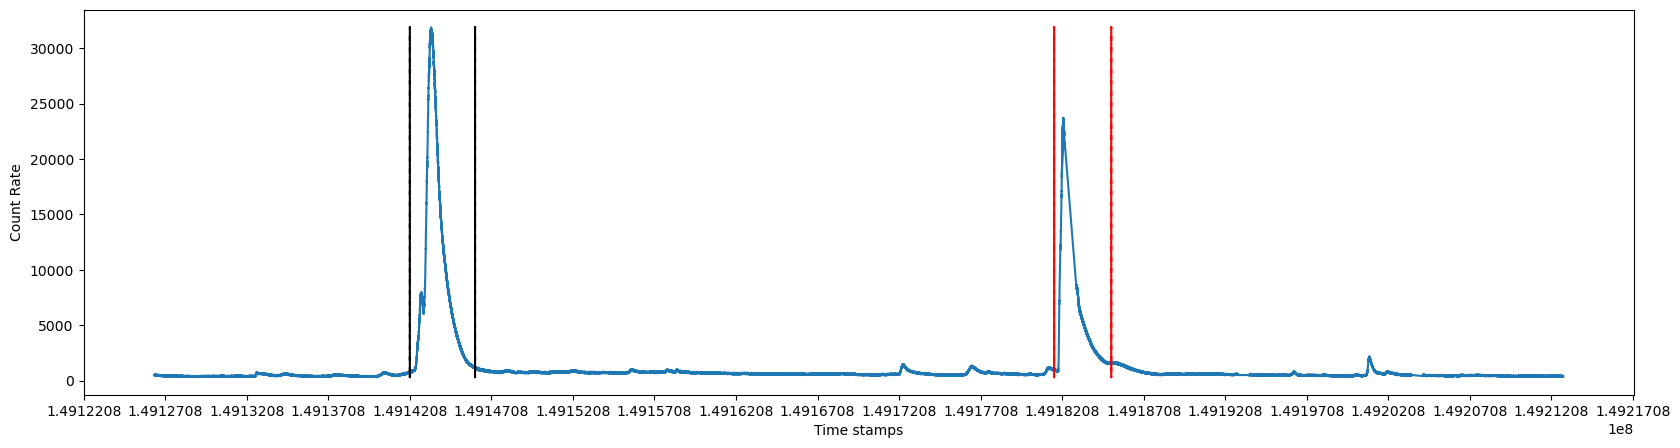

In [245]:
time1 = lc_data[0].field('TIME')
rate1 = lc_data[0].field('RATE')
def lc1_plot():
    plt.figure(figsize=(20,5))
    plt.plot(time1, rate1)
    plt.xticks(np.arange(plt.xlim()[0],plt.xlim()[1], 5000))
    plt.plot(1.4914208*10**8*np.ones_like(rate1), rate1, 'k--')
    plt.plot(1.4914608*10**8*np.ones_like(rate1), rate1, 'k--')
    plt.plot(1.4918158*10**8*np.ones_like(rate1), rate1, 'r--')
    plt.plot(1.4918508*10**8*np.ones_like(rate1), rate1, 'r--')
    plt.ylabel("Count Rate")
    plt.xlabel("Time stamps")

lc1_plot()
plt.show()

### LC File 2

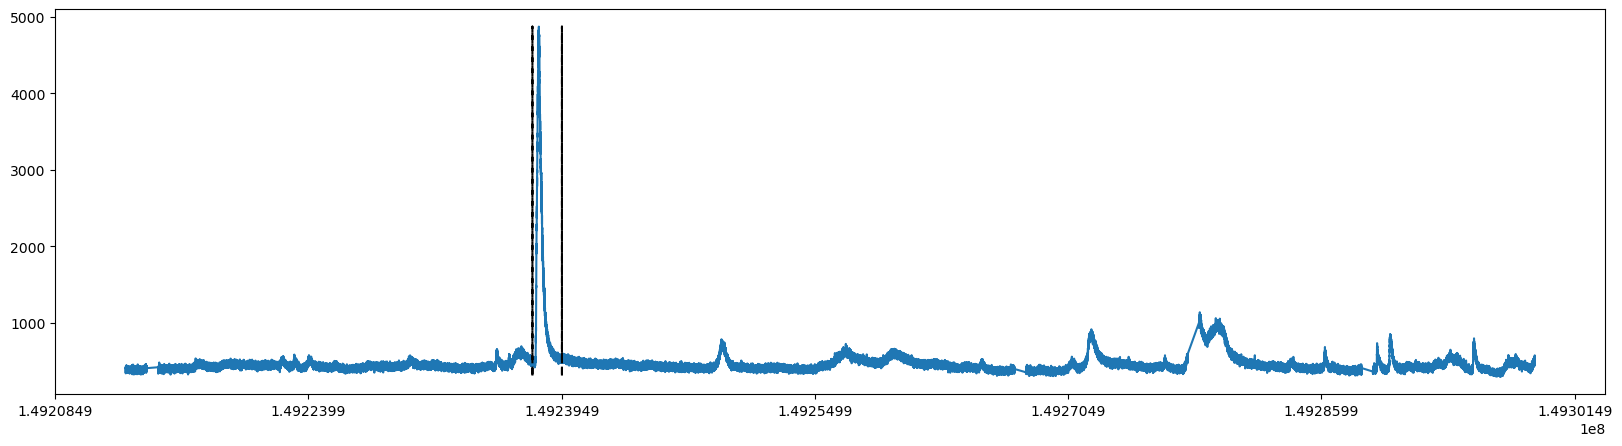

In [238]:
time2 = lc_data[1].field('TIME')
rate2 = lc_data[1].field('RATE')
def lc2_plot():
    plt.figure(figsize=(20,5))
    plt.plot(time2, rate2)
    plt.xticks(np.arange(plt.xlim()[0],plt.xlim()[1], 15500))
    plt.plot(1.4923770*10**8*np.ones_like(rate2), rate2, 'k--')
    plt.plot(1.4923950*10**8*np.ones_like(rate2), rate2, 'k--')

lc2_plot()
plt.show()

### LC File 3

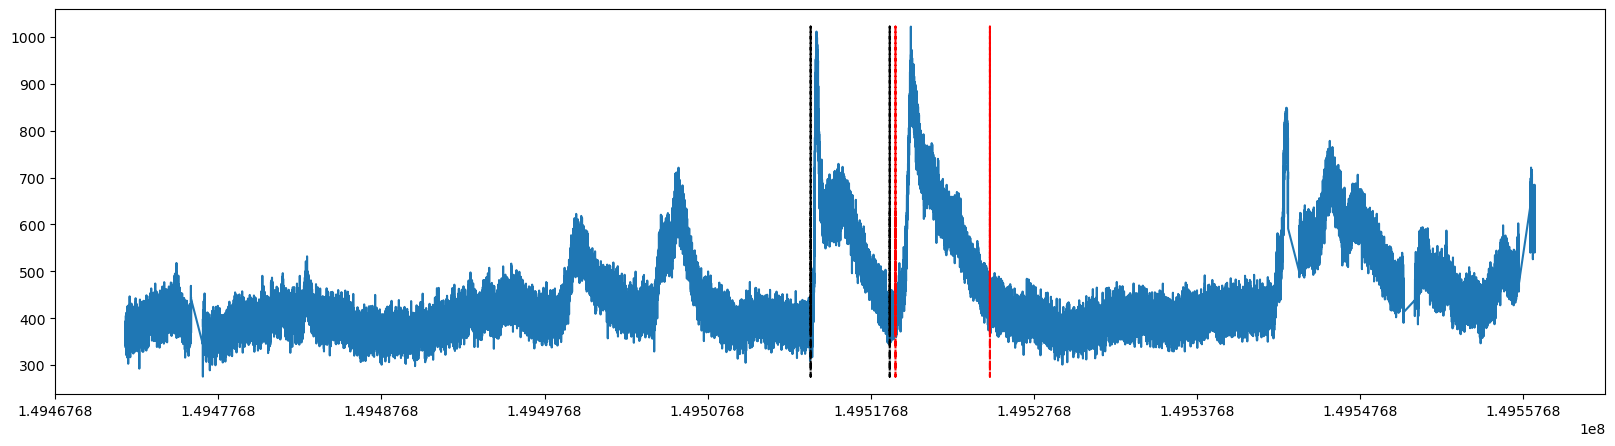

In [246]:
time = lc_data[2].field('TIME')
rate = lc_data[2].field('RATE')
plt.figure(figsize=(20,5))
plt.plot(time, rate)
plt.xticks(np.arange(plt.xlim()[0],plt.xlim()[1], 10000))
plt.plot(1.4951400*10**8*np.ones_like(rate), rate, 'k--')
plt.plot(1.4951885*10**8*np.ones_like(rate), rate, 'k--')
plt.plot(1.4951920*10**8*np.ones_like(rate), rate, 'r--')
plt.plot(1.4952500*10**8*np.ones_like(rate), rate, 'r--')
plt.show()

### LC File 4

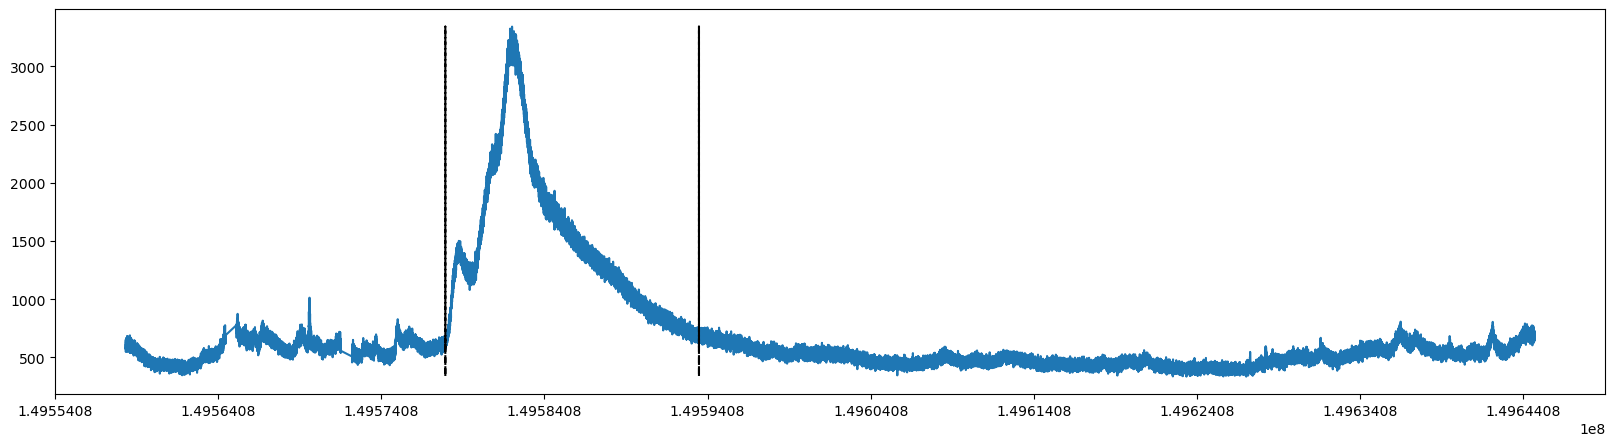

In [146]:
time = lc_data[3].field('TIME')
rate = lc_data[3].field('RATE')
plt.figure(figsize=(20,5))
plt.plot(time, rate)
plt.xticks(np.arange(plt.xlim()[0],plt.xlim()[1], 10000))
plt.plot(1.4957800*10**8*np.ones_like(rate), rate, 'k--')
plt.plot(1.4959355*10**8*np.ones_like(rate), rate, 'k--')
plt.show()

### LC File 5

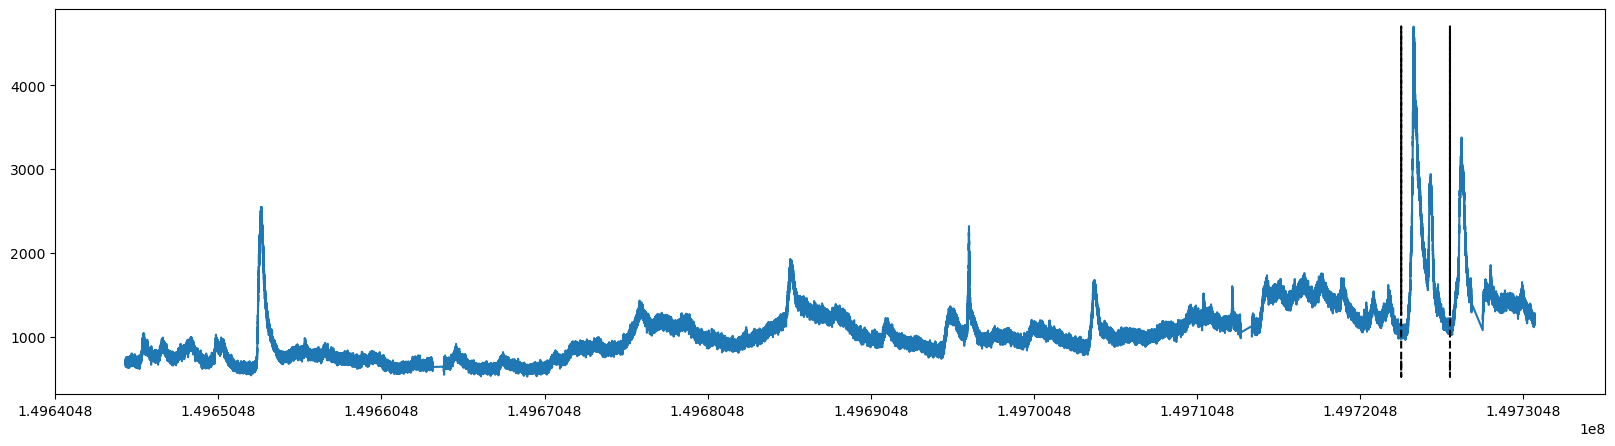

In [189]:
time = lc_data[4].field('TIME')
rate = lc_data[4].field('RATE')
plt.figure(figsize=(20,5))
plt.plot(time, rate)
plt.xticks(np.arange(plt.xlim()[0],plt.xlim()[1], 10000))
plt.plot(1.4972300*10**8*np.ones_like(rate), rate, '--k')
plt.plot(1.4972600*10**8*np.ones_like(rate), rate, '--k')
plt.show()

### 3. c)

### For LC File 1: $\newline$
Flare 1

In [248]:
avg_count1 = np.average(rate1)

count_avg_1 = np.average(rate1[np.where((time1>1.4914208*10**8) & (time1<1.4914608*10**8))])
count_max_1 = np.max(rate1[np.where((time1>1.4914208*10**8) & (time1<1.4914608*10**8))])
avg_rise_1 = (count_max_1 - avg_count1)/(time1[np.where(rate1==count_max_1)] - 1.4914208*10**8)[0]
avg_fall_1 = (avg_count1 - count_max_1)/(time1[np.where(rate1==count_max_1)] - 1.4914608*10**8)[0]


print("Average count rate during flare: " +str(count_avg_1))
print("Maximum count rate during flare: "+ str(count_max_1))
print("Average rise during flare: "+str(avg_rise_1))
print("Average fall during flare: " +str(avg_fall_1))



Average count rate during flare: 9168.647
Maximum count rate during flare: 31883.889
Average rise during flare: 23.55463857996382
Average fall during flare: 11.402149775552914


Flare 2

In [249]:
count_avg_2 = np.average(rate1[np.where((time1>1.4918158*10**8) & (time1<1.4918508*10**8))])
count_max_2 = np.max(rate1[np.where((time1>1.4918158*10**8) & (time1<1.4918508*10**8))])
avg_rise_2 = (count_max_2 - avg_count1)/(time1[np.where(rate1==count_max_2)] - 1.4918158*10**8)[0]
avg_fall_2 = (avg_count1 - count_max_2)/(time1[np.where(rate1==count_max_2)] - 1.4918508*10**8)[0]


print("Average count rate during flare: " +str(count_avg_2))
print("Maximum count rate during flare: "+ str(count_max_2))
print("Average rise during flare: "+str(avg_rise_2))
print("Average fall during flare: " +str(avg_fall_2))


Average count rate during flare: 4985.81
Maximum count rate during flare: 23705.484
Average rise during flare: 40.00906151027415
Average fall during flare: 7.681013241518965


### For LC File 2
Flare 1

In [250]:
avg_count2 = np.average(rate2)

count_avg_3 = np.average(rate2[np.where((time2>1.4923770*10**8) & (time2<1.4923950*10**8))])
count_max_3 = np.max(rate2[np.where((time2>1.4923770*10**8) & (time2<1.4923950*10**8))])
avg_rise_3 = (count_max_3 - avg_count2)/(time2[np.where(rate2==count_max_3)] - 1.4923770*10**8)[0]
avg_fall_3 = (avg_count2 - count_max_3)/(time2[np.where(rate2==count_max_3)] - 1.4923950*10**8)[0]


print("Average count rate during flare: " +str(count_avg_3))
print("Maximum count rate during flare: "+ str(count_max_3))
print("Average rise during flare: "+str(avg_rise_3))
print("Average fall during flare: " +str(avg_fall_3))

Average count rate during flare: 1290.9613
Maximum count rate during flare: 4872.3403
Average rise during flare: 11.297144037378725
Average fall during flare: 3.118731304454106


### 3. d)

In [216]:
count_bg_avg1 = np.average(rate1[np.where((time1<1.4914208*10**8) | ((time1>1.4914608*10**8) & (time1<1.4918158*10**8)) | (time1>1.4918508*10**8))])
count_bg_avg3 = np.average(rate2[np.where((time2<1.4923770*10**8) | (time2>1.4923950*10**8))])

print("Average background counts \t Average flare counts")
print("\t" + str(count_bg_avg1)+"\t \t \t"+str(count_avg_1))
print("\t" + str(count_bg_avg1)+"\t \t \t"+str(count_avg_2))
print("\t" + str(count_bg_avg3)+"\t \t \t"+str(count_avg_3))

Average background counts 	 Average flare counts
	599.39923	 	 	9168.647
	599.39923	 	 	4985.81
	455.06216	 	 	1290.9613


Here, the first two flares are of LC File 1 and the third flare is from LC File 2. $\newline$ Hence, it can be easily seen that the average background counts is much lesser than the average flare counts.

### 4. a)

In [217]:
std_bg1 = np.std(rate1[np.where((time1<1.4914208*10**8) | ((time1>1.4914608*10**8) & (time1<1.4918158*10**8)) | (time1>1.4918508*10**8))])
std_bg3 = np.std(rate2[np.where((time2<1.4923770*10**8) | (time2>1.4923950*10**8))])
std_1 = np.std(rate1)
std_3 = np.std(rate2)

print("Standard deviation of background in LC File 1: "+str(std_bg1))
print("Standard deviation of background in LC File 2: "+str(std_bg3))
print("Standard deviation of background + flare in LC File 1: "+str(std_1))
print("Standard deviation of background + flare in LC File 2: "+str(std_3))


Standard deviation of background in LC File 1: 204.89789
Standard deviation of background in LC File 2: 90.69888
Standard deviation of background + flare in LC File 1: 2969.9165
Standard deviation of background + flare in LC File 2: 230.59785


### For LC File 1

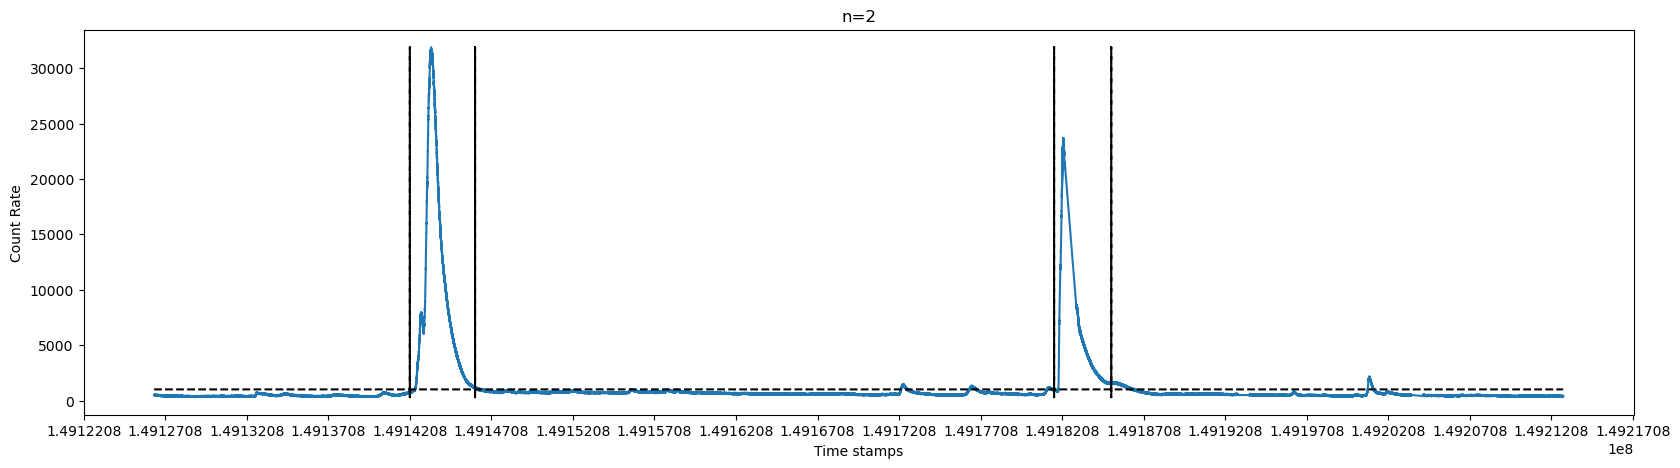

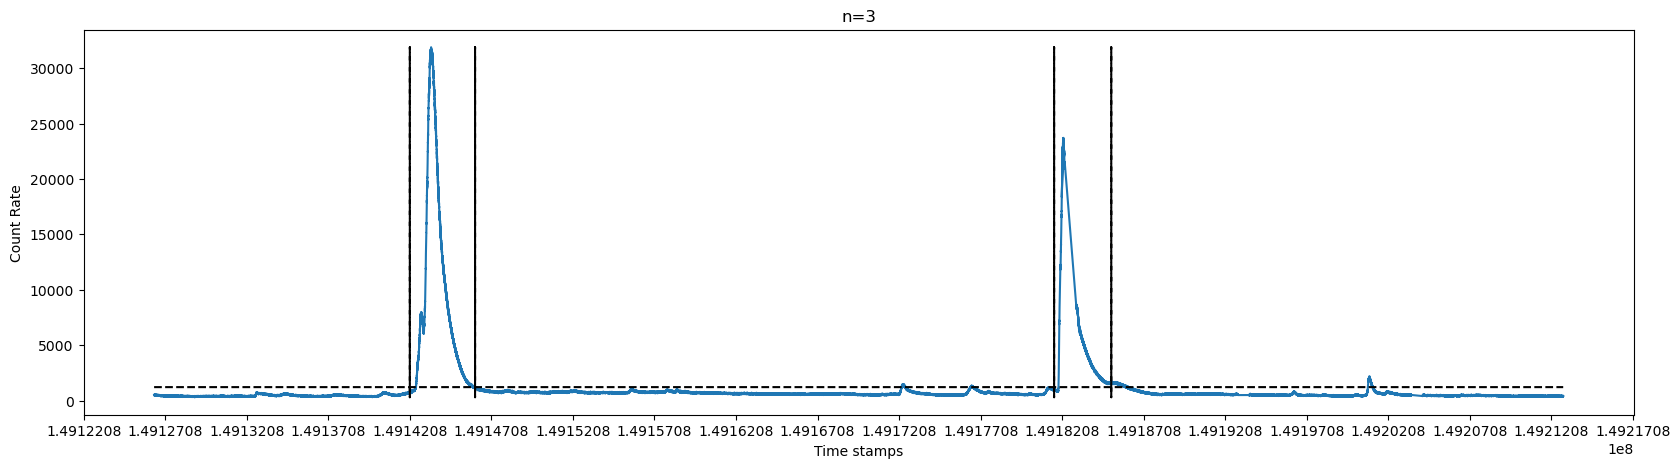

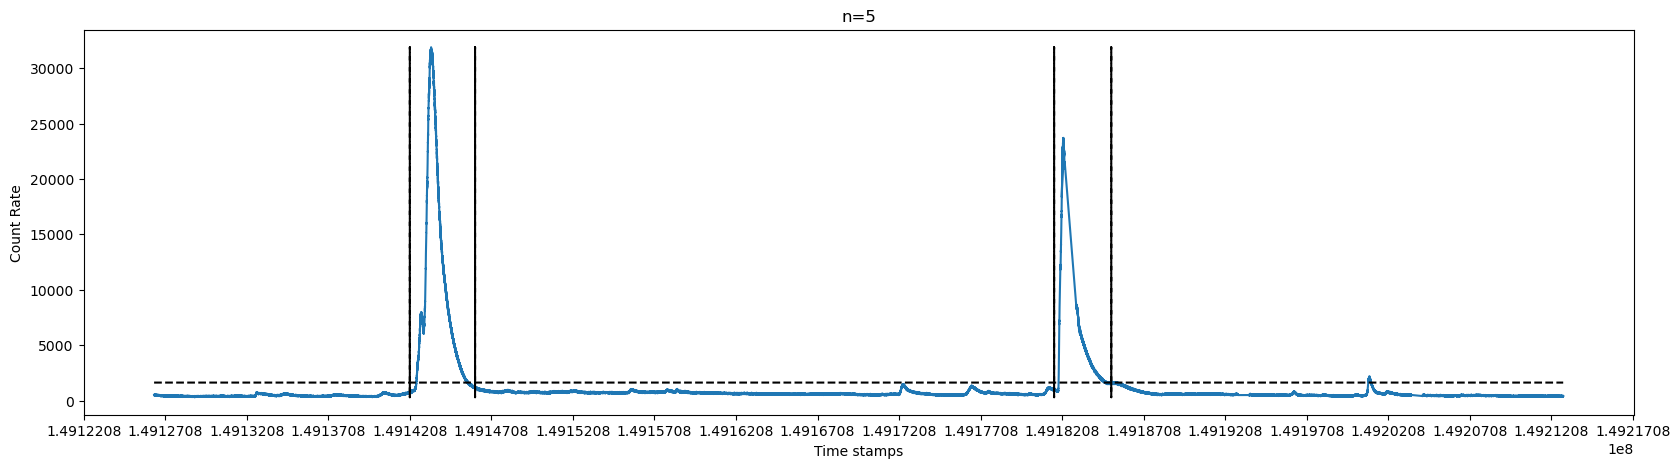

In [239]:
def n_sigma1(n):
    x = count_bg_avg1 + n*std_bg1
    lc1_plot()
    plt.plot(time1, x*np.ones_like(time1), 'k--')
    plt.title('n='+str(n))
    


n_sigma1(2)
n_sigma1(3)
n_sigma1(5)

Clearly, n=3 gives the best approximation for identifying flares in LC File 1.

### For LC File 2:

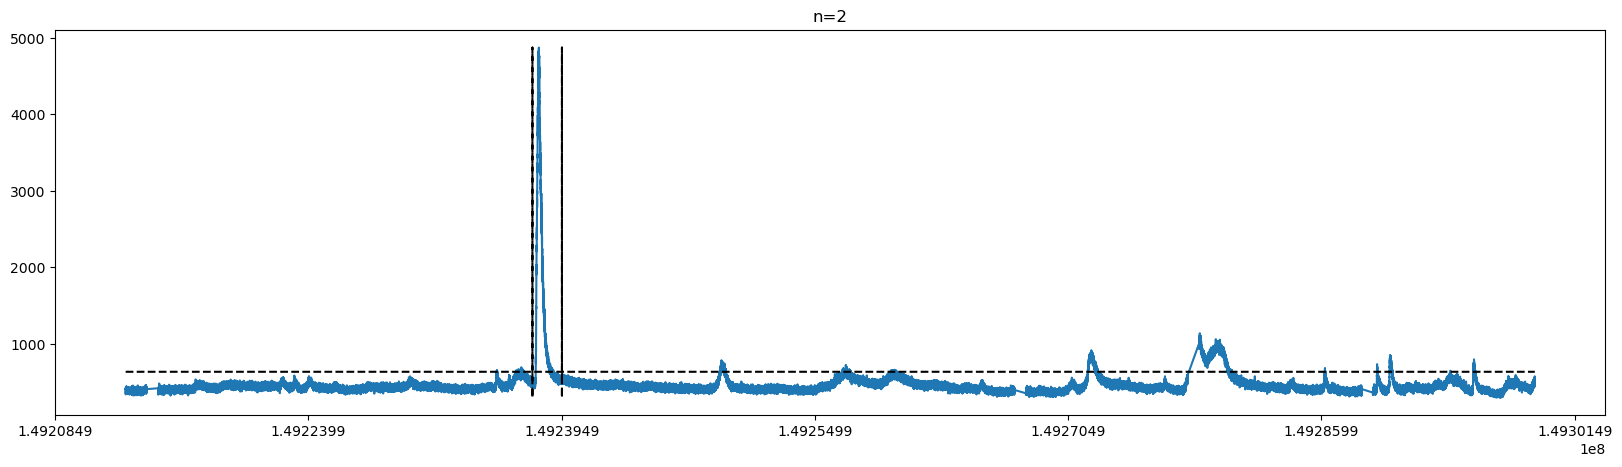

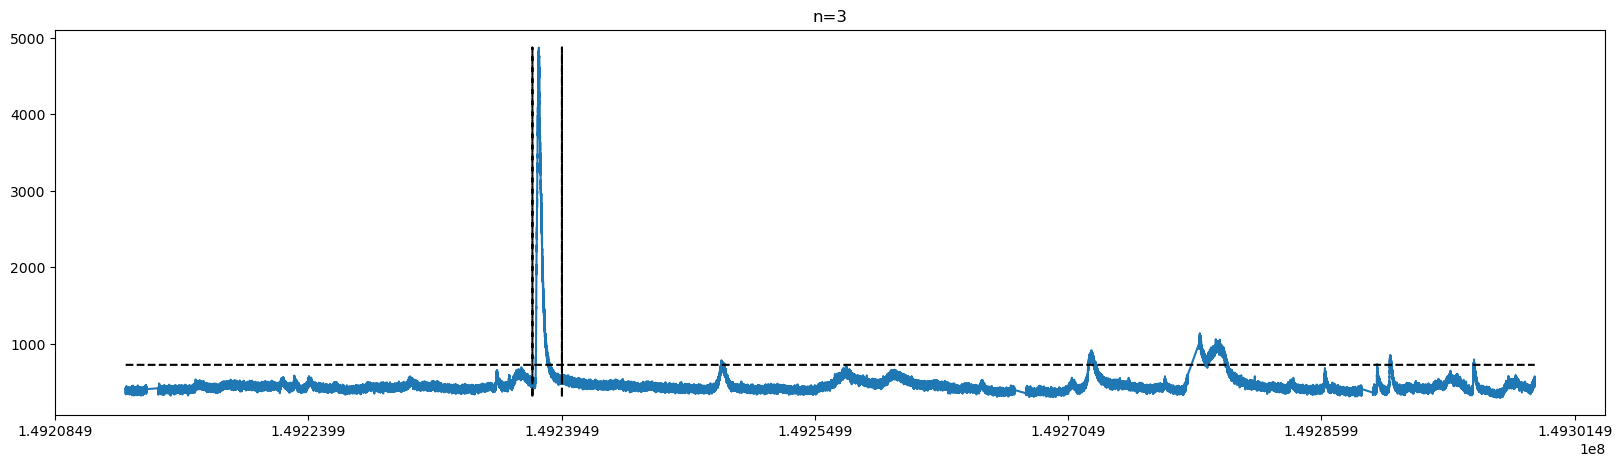

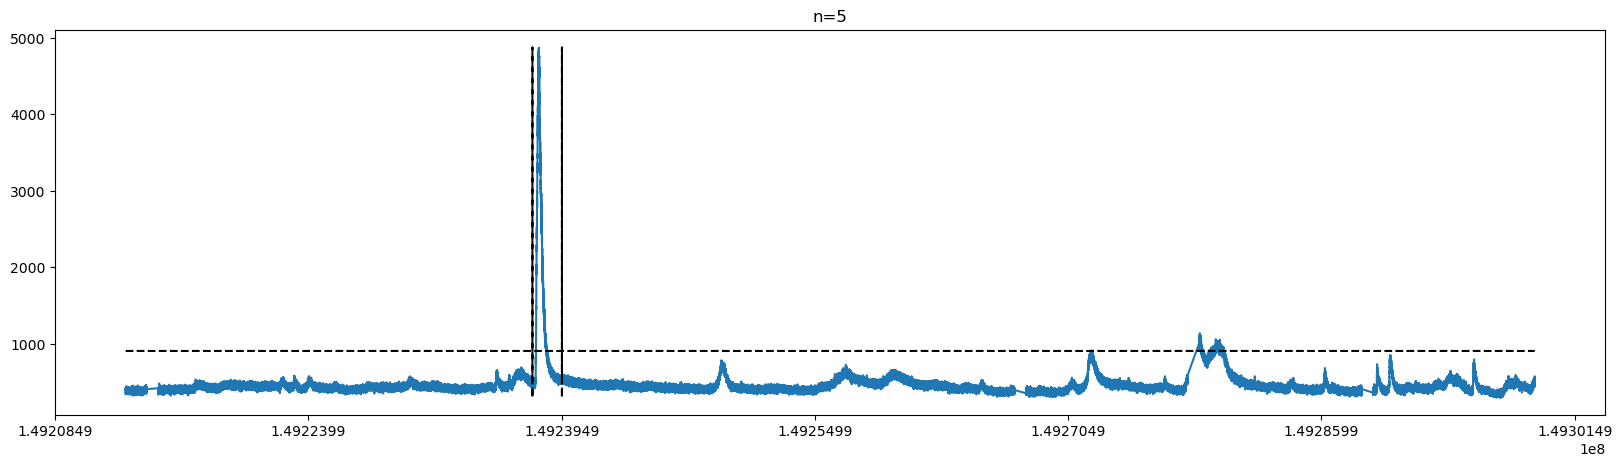

In [240]:
def n_sigma2(n):   
    x = count_bg_avg3 + n*std_bg3
    lc2_plot()
    plt.plot(time2, x*np.ones_like(time2), 'k--')
    plt.title('n='+str(n))
    plt.show()

n_sigma2(2)
n_sigma2(3)
n_sigma2(5)

Clearly, n=2 is the best approximation for identifying flares in LC File 2.